# Foundations of Computational Economics #15

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Introduction to Data Manipulation in Python (Pandas)

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/61pHVbZubmo](https://youtu.be/61pHVbZubmo)

Description: Introduction into DataFrames, grouping and data merging.

### Scientific stack in Python

Collection of modules (libraries) used in scientific numerical computations:

- **``NumPy``** is widely-used scientific computing package for implements fast array processing — vectorization  
- **``SciPy``** is a collection of functions that perform common scientific operations (optimization, root finding, interpolation, numerical integration, etc.)  
- **``Pandas``** is data manipulation package with special data types and methods  
- **``Numba``** is just in time (JIT) compiler for a subset of Python and NumPy functions  
- **``Matplotlib``** serves for making figures and plots  

#### What is Pandas?

- Pandas provides classes for working with data (`Series`, `DataFrame`)  
- Data objects have **methods** for manipulating data eg. indexing, sorting, grouping, filling in missing data  
- Pandas does not provide modeling tools eg. regression, prediction  
- These tools are found in packages such as `scikit-learn` and `statsmodels`, which are built on top of pandas  

#### DataFrames

A `DataFrame` combines multiple ‘columns’ of data into a
two-dimensional object, similar to a spreadsheet

<img src="_static/img/dataframe.jpg" style="width:800px;">

#### Create and explore the dataframe object

In [1]:
import pandas as pd
data = pd.read_csv('./_static/data/recent-grads.csv')
# help(data) # more help on dataframe object and its methods

In [2]:
# Preview of the dataset
data.head(n=10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


#### Description of the data

**The Economic Guide To Picking A College Major**

[https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/)

Data dictionary available at

[https://github.com/fivethirtyeight/data/tree/master/college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [3]:
# Info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

#### Access individual columns of data

This returns a `Series` object

In [4]:
data1 = data['Major']
print('Type of data1 is ',type(data1))
data1.head()

Type of data1 is  <class 'pandas.core.series.Series'>


0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                         CHEMICAL ENGINEERING
Name: Major, dtype: object

#### Access multiple columns of data

This returns a `DataFrame` object again

In [5]:
data2 = data[['Major', 'ShareWomen']]
print('Type of data2 is ',type(data2))
data2.head()

Type of data2 is  <class 'pandas.core.frame.DataFrame'>


,Major,ShareWomen
0,PETROLEUM ENGINEERING,0.120564
1,MINING AND MINERAL ENGINEERING,0.101852
2,METALLURGICAL ENGINEERING,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313
4,CHEMICAL ENGINEERING,0.341631


#### Add a new column Stata style

In [6]:
data['Employment rate'] = data['Employed'] / data['Total']
data[['Total', 'Employed', 'Employment rate']].head()

,Total,Employed,Employment rate
0,2339.0,1976,0.844805
1,756.0,640,0.846561
2,856.0,648,0.757009
3,1258.0,758,0.602544
4,32260.0,25694,0.796466


#### Average unemployment rate…

In [7]:
data['Unemployment_rate'].mean() * 100

6.819083091329481

#### Simple summary statistics

`.describe()` returns useful summary statistics

In [8]:
data['Unemployment_rate'].describe()

count    173.000000
mean       0.068191
std        0.030331
min        0.000000
25%        0.050306
50%        0.067961
75%        0.087557
max        0.177226
Name: Unemployment_rate, dtype: float64

#### Simple plots

Pandas also provides a simple way to generate matplotlib plots

Text(0, 0.5, 'Median salary')

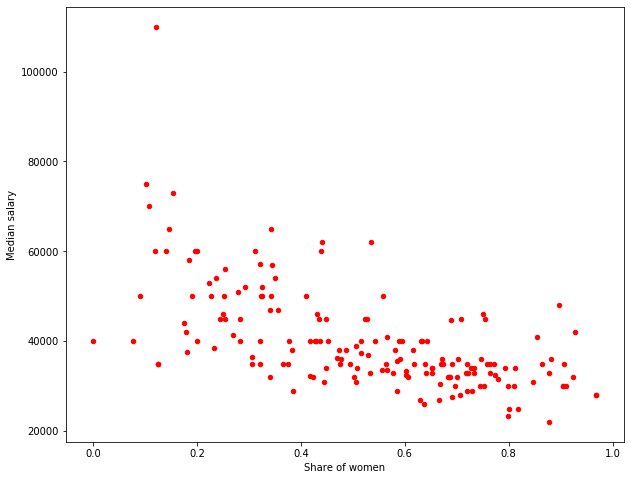

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')

### Selecting and filtering

We can use integer slicing to select rows as follows

In [10]:
data[:3]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009


#### Majors with the highest share of women

First we will sort our values by a column in the dataframe

In [11]:
data.sort_values(by='ShareWomen', ascending=False)[:3]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,20748,1360,0.040105,28000,21000,35000,23515,7705,2868,0.865971
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,14460,1487,0.047584,28000,20000,40000,19957,9404,5125,0.777528
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4290,407,0.042507,42000,30000,65000,2091,6948,1270,0.824238


#### Using row index

Another way to select rows is to use row labels, i.e. set a row index

Similar to the column labels, we can add row labels (the index)

In [12]:
data.set_index('Major_code').head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
2419,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
2416,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2415,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
2417,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
2405,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


#### Need to overwrite dataframe

Note: we haven’t actually changed the DataFrame `data`

Need to overwrite `data` with the new copy

In [13]:
data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


In [14]:
data = data.set_index('Major_code')
# Could also use data.set_index('Major_code', inplace=True)
data.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
2419,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
2416,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2415,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
2417,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
2405,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


#### After index is set, we can access with `loc`

Using `Major_code` variable values as labels for rows

In [15]:
data.loc[2405]

Rank                                       5
Major                   CHEMICAL ENGINEERING
Total                                  32260
Men                                    21239
Women                                  11021
Major_category                   Engineering
ShareWomen                          0.341631
Sample_size                              289
Employed                               25694
Full_time                              23170
Part_time                               5180
Full_time_year_round                   16697
Unemployed                              1672
Unemployment_rate                  0.0610977
Median                                 65000
P25th                                  50000
P75th                                  75000
College_jobs                           18314
Non_college_jobs                        4440
Low_wage_jobs                            972
Employment rate                     0.796466
Name: 2405, dtype: object

In [16]:
code_list = [6102, 5001]

data.loc[code_list]

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6102,164,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,19975,...,14460,1487,0.047584,28000,20000,40000,19957,9404,5125,0.777528
5001,8,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,...,827,33,0.021167,62000,31500,109000,972,500,220,0.851562


#### Sorting index

Recommended for efficient selecting and filtering

In [17]:
data.sort_index(inplace=True)
data.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
1100,65,GENERAL AGRICULTURE,10399.0,6053.0,4346.0,Agriculture & Natural Resources,0.417925,158,8884,7589,...,5888,178,0.019642,40000,30000,50000,2418,4717,839,0.854313
1101,64,AGRICULTURE PRODUCTION AND MANAGEMENT,14240.0,9658.0,4582.0,Agriculture & Natural Resources,0.321770,273,12323,11119,...,9093,649,0.050031,40000,25000,50000,1925,6221,1362,0.865379
1102,72,AGRICULTURAL ECONOMICS,2439.0,1749.0,690.0,Agriculture & Natural Resources,0.282903,44,2174,1819,...,1528,182,0.077250,40000,27000,54000,535,893,94,0.891349
1103,153,ANIMAL SCIENCES,21573.0,5347.0,16226.0,Agriculture & Natural Resources,0.752144,255,17112,14479,...,10824,917,0.050862,30000,22000,40000,5443,9571,2125,0.793214
1104,22,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,2558,...,1735,338,0.096931,53000,32000,70000,1183,1274,485,NaN


#### Selecting rows

Alternatively, we can filter our dataframe (select rows) using *boolean conditions*

In [18]:
selection = data['Major_category'] == 'Arts'
data[selection].head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6000,150,FINE ARTS,74440.0,24786.0,49654.0,Arts,0.667034,623,59679,42764,...,31877,5486,0.084186,30500,21000,41000,20792,32725,11880,0.801706
6001,167,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,25147,...,16891,3040,0.077541,27000,19200,35000,6994,25313,11068,0.836204
6002,147,MUSIC,60633.0,29909.0,30724.0,Arts,0.506721,419,47662,29010,...,21425,3918,0.075960,31000,22300,42000,13752,28786,9286,0.786074
6003,154,VISUAL AND PERFORMING ARTS,16250.0,4133.0,12117.0,Arts,0.745662,132,12870,8447,...,6322,1465,0.102197,30000,22000,40000,3849,7635,2840,0.792000
6004,96,COMMERCIAL ART AND GRAPHIC DESIGN,103480.0,32041.0,71439.0,Arts,0.690365,1186,83483,67448,...,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,0.806755


In [19]:
selection = data['Major_category'] == 'Arts'
data[selection & (data['Total'] > 100000)].head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6004,96,COMMERCIAL ART AND GRAPHIC DESIGN,103480.0,32041.0,71439.0,Arts,0.690365,1186,83483,67448,...,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,0.806755


### Grouping and aggregating data

We might want to summarize our data by grouping it by major categories

To do this, we will use the `.groupby()` function

In [20]:
grouped = data.groupby('Major_category')
grouped

In [21]:
print(type(grouped))
print(type(grouped.groups))
grouped.groups

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'dict'>


{'Agriculture & Natural Resources': Int64Index([1100, 1101, 1102, 1103, 1104, 1105, 1106, 1199, 1302, 1303], dtype='int64', name='Major_code'),
 'Arts': Int64Index([6000, 6001, 6002, 6003, 6004, 6005, 6007, 6099], dtype='int64', name='Major_code'),
 'Biology & Life Science': Int64Index([1301, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609,
             3611, 3699, 4006],
            dtype='int64', name='Major_code'),
 'Business': Int64Index([6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6209, 6210, 6211,
             6212, 6299],
            dtype='int64', name='Major_code'),
 'Communications & Journalism': Int64Index([1901, 1902, 1903, 1904], dtype='int64', name='Major_code'),
 'Computers & Mathematics': Int64Index([2001, 2100, 2101, 2102, 2105, 2106, 2107, 3700, 3701, 3702, 4005], dtype='int64', name='Major_code'),
 'Education': Int64Index([2300, 2301, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311,
             2312, 2313, 2314, 2399, 3501],
            dtype='in

#### Reduce functions for the grouped data

To return an *aggregated* dataframe, we need to specify the function we
would like pandas to use to aggregate our groups

- Mean  
- Sum  
- Count  


A list of built-in aggregatation functions [https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
grouped.mean()

,Rank,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_category,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,101.500000,8402.222222,4484.111111,3918.111111,0.405267,110.400000,6694.300000,5814.300000,1659.100000,4362.600000,382.400000,0.056328,36900.000000,25400.000000,48010.000000,1986.000000,3449.100000,789.900000,0.860603
Arts,131.125000,44641.250000,16798.750000,27842.500000,0.603658,407.500000,36014.250000,25971.625000,14348.875000,19138.875000,3528.500000,0.090173,33062.500000,21962.500000,43662.500000,11848.125000,20465.000000,7514.500000,0.815670
Biology & Life Science,95.357143,32418.714286,13208.500000,19210.214286,0.587193,165.500000,21628.357143,17169.785714,8338.285714,11843.000000,1632.428571,0.060918,36421.428571,26614.285714,46085.714286,10802.357143,9084.428571,3053.000000,0.700543
Business,55.846154,100182.769231,51373.230769,48809.538462,0.483198,1192.692308,83749.384615,76066.923077,15148.923077,60801.923077,6144.384615,0.071064,43538.461538,33461.538462,54846.153846,11426.000000,38197.692308,9752.923077,0.829638
Communications & Journalism,104.000000,98150.250000,32980.250000,65170.000000,0.658384,1127.000000,82665.000000,68332.500000,22454.250000,53557.000000,6713.000000,0.075538,34500.000000,26250.000000,44975.000000,21639.000000,43248.000000,12398.750000,0.844534
Computers & Mathematics,57.000000,27182.545455,18975.000000,8207.545455,0.311772,260.000000,21626.727273,18867.727273,4842.727273,14468.727273,1670.272727,0.084256,42745.454545,29290.909091,58090.909091,12532.636364,6769.363636,1466.909091,0.799617
Education,130.375000,34945.562500,6470.375000,28475.187500,0.748507,296.375000,29989.937500,24878.687500,7537.062500,18001.937500,1560.562500,0.051702,32350.000000,26590.625000,38562.500000,21169.562500,7610.062500,2554.375000,0.856697
Engineering,22.620690,18537.344828,14079.551724,4457.793103,0.238889,169.862069,14495.586207,13167.827586,2935.724138,9963.862069,1028.172414,0.063334,57382.758621,41555.172414,70448.275862,9302.310345,3530.448276,864.793103,0.787311
Health,96.500000,38602.500000,6293.083333,32309.416667,0.795152,326.166667,31012.250000,24568.250000,9549.333333,19034.833333,1851.083333,0.065920,36825.000000,26166.666667,50250.000000,20453.416667,9208.000000,2605.833333,0.758078


In [23]:
grouped['Median'].mean()

Major_category
Agriculture & Natural Resources        36900.000000
Arts                                   33062.500000
Biology & Life Science                 36421.428571
Business                               43538.461538
Communications & Journalism            34500.000000
Computers & Mathematics                42745.454545
Education                              32350.000000
Engineering                            57382.758621
Health                                 36825.000000
Humanities & Liberal Arts              31913.333333
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Psychology & Social Work               30100.000000
Social Science                         37344.444444
Name: Median, dtype: float64

In [24]:
grouped['Median'].agg(['mean', 'median', 'std'])

,mean,median,std
Major_category,,,
Agriculture & Natural Resources,36900.000000,35000,6935.416354
Arts,33062.500000,30750,7223.164621
Biology & Life Science,36421.428571,36300,4528.912006
Business,43538.461538,40000,7774.052832
Communications & Journalism,34500.000000,35000,1000.000000
Computers & Mathematics,42745.454545,45000,5108.691346
Education,32350.000000,32750,3892.728263
Engineering,57382.758621,57000,13626.079747
Health,36825.000000,35000,5776.460854


#### Plot from GroupBy objects

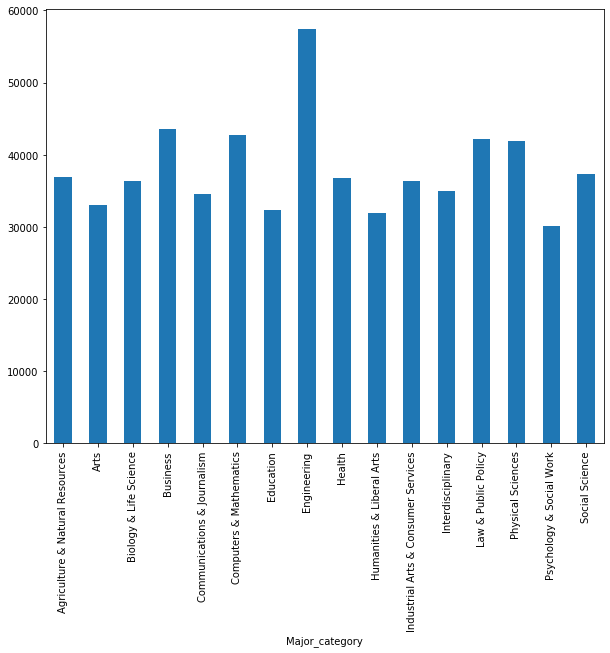

In [25]:
grouped['Median'].mean().plot(kind='bar', figsize=(10, 8))

### Merging and appending data

Simple example with fictitious data

In [26]:
raw_data_1 = {'subject_id': ['1', '2', '3', '4', '5'],
              'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
              'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {'subject_id': ['4', '5', '6', '7', '8'],
              'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
              'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
              'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [27]:
# Assign each to a dataframe called data1, data2, data3
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [28]:
# Print data 1
data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [29]:
# Print data 2
data2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [30]:
# Print data 3
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [31]:
# Join the two dataframes along rows
data_all_rows = pd.concat([data1, data2])
data_all_rows

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [32]:
# Join the two dataframes along columns
data_all_col = pd.concat([data1, data2], axis = 1)
data_all_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [33]:
# Merge data_all_rows and data3 along the subject_id value
pd.merge(data_all_rows, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [34]:
# Inner merge
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [35]:
# Outer merge
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


### Further learning resources

- Reference manual for Pandas
  [https://pandas.pydata.org/pandas-docs/stable/getting_started/](https://pandas.pydata.org/pandas-docs/stable/getting_started/)  
- Pandas at QuantEcon lectures
  [https://lectures.quantecon.org/py/pandas.html](https://lectures.quantecon.org/py/pandas.html)
  [https://lectures.quantecon.org/py/pandas_panel.html](https://lectures.quantecon.org/py/pandas_panel.html)  
- Pandas at QuantEcon DataScience
  [https://datascience.quantecon.org/pandas/](https://datascience.quantecon.org/pandas/)  
- QuantEcon [Stata-R-Pandas
  cheatsheet](https://cheatsheets.quantecon.org/stats-cheatsheet.html)  
- 📖 Kevin Sheppard “Introduction to Python for Econometrics, Statistics
  and Data Analysis.” *Chapter: 9, 16*  